In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
file = "/content/drive/My Drive/ddd.rar"
!pip install rarfile
!pip install patool
from patoolib import extract_archive
import os
extract_to = 'data'
os.mkdir(extract_to) 
extract_archive(file, outdir=extract_to)

     |████████████████████████████████| 122kB 33.8MB/s 
  Created wheel for rarfile: filename=rarfile-3.1-cp36-none-any.whl size=24908 sha256=e38fc9c81b2fac7ee2d337b5f7f27815395312d44a80155fab33a0b2fccc54bf
  Stored in directory: /root/.cache/pip/wheels/23/3c/c8/0215b6a5079492eff3be3f545ae0b0c4a66734c35c9e444eac
Successfully built rarfile
     |████████████████████████████████| 81kB 8.6MB/s 
patool: Extracting /content/drive/My Drive/ddd.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/ddd.rar"
patool:     with cwd='data'
patool: ... /content/drive/My Drive/ddd.rar extracted to `data'.


'data'

In [0]:
data_dir = '/content/data/ddd'

In [132]:
os.listdir(data_dir)

['train', 'test']

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:

test_path = data_dir+"/test/"
train_path = data_dir+"/train/"

In [135]:
os.listdir(test_path)

['K',
 'J',
 'D',
 'A',
 'I',
 'E',
 'U',
 'Z',
 'O',
 'X',
 'M',
 'L',
 'W',
 'N',
 'H',
 'B',
 'R',
 'F',
 'T',
 'C',
 'P',
 'S',
 'V',
 'Q',
 'G',
 'Y']

In [136]:
os.listdir(train_path)

['K',
 'J',
 'D',
 'A',
 'I',
 'E',
 'U',
 'Z',
 'O',
 'X',
 'M',
 'L',
 'W',
 'N',
 'H',
 'B',
 'R',
 'F',
 'T',
 'C',
 'P',
 'S',
 'V',
 'Q',
 'G',
 'Y']

In [137]:
os.listdir(train_path+'B')[0]

'B-8440.png'

In [0]:
image_1_file_location =train_path+'B/'+ 'B-0.png'

In [139]:
image_1_file_location

'/content/data/ddd/train/B/B-0.png'

In [140]:
imread(image_1_file_location).shape

(28, 28)

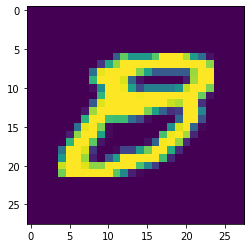

In [141]:
plt.imshow(imread(image_1_file_location))

In [0]:
image_shape = (28,28,1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [145]:
image_gen.flow_from_directory(train_path)

Found 374651 images belonging to 26 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))


#model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
#model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#26 is the #of classes
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [0]:
batch_size = 256

In [176]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 374651 images belonging to 26 classes.


In [177]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=False)

Found 2200 images belonging to 26 classes.


In [178]:
train_image_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [0]:
results = model.fit(train_image_gen,
                              epochs=100,
                             validation_data=test_image_gen,
                             callbacks=[early_stop],
                    )

Epoch 1/100
 208/1464 [===>..........................] - ETA: 2:40 - loss: 0.0879 - acc: 0.9740

#Model Evaluation

In [0]:
test_image_gen.reset()

In [0]:
model.evaluate_generator(test_image_gen)

In [0]:
test_image_gen.reset()

In [0]:
scores = model.evaluate(test_image_gen, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Acuracy: %.2f%%" % (scores[1]*100))

In [0]:
pred= model.predict_generator(test_image_gen)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_image_gen.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predicted_class_indices, test_image_gen.classes))

In [0]:
print(classification_report(test_image_gen.classes,predicted_class_indices))

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
my_image = image.load_img(image_1_file_location,target_size=image_shape,grayscale=True)

In [0]:
my_image

In [0]:
my_image_arr = image.img_to_array(my_image)
my_image_arr.shape

In [0]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)
#my_image_arr

In [0]:
model.predict_classes(my_image_arr)

In [0]:
p = model.predict_classes(my_image_arr)

In [0]:
print(f"Predicted Character is {labels2[p[0]]}")

In [0]:
!mkdir -p saved_model
model.save('saved_model/my_aplha2')